In [1]:
# some plot settings
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.family'] = "CMU Serif"
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams['figure.dpi'] = 120 
plt.rc('text', usetex=True) 

## 8. A toilet paper dilemma

The toilet paper dispensers in a certain building are designed to hold two roles of tissues, and a person can use either roll. There are two kinds of people who use the rest rooms in the building: big-choosers and little-choosers. A big-chooser always takes a piece of toilet paper from the roll that is currently larger; a little-chooser does the opposite. However, when the two rolls are the same size, or when only one roll is nonempty, everybody chooses the nearest nonempty roll. When both rolls are empty, everybody has a problem.

Let us assume that people enter the toilet stalls independently at random, with probability $p$ that they are big-choosers and with probability $q = 1 − p$ that they are little-choosers. If the janitor supplies a particular stall with two fresh rolls of toilet paper, both of length $n$, let $M_n(p)$ be the average number of portions left on one roll when the other roll empties. (We assume that everyone uses the same amount of paper, and that the lengths are expressed in terms of this unit.) What is $M_n(p)$?

Use Knuth’s recurrences to calculate the numerical values of $M_n(p)$ as $p$ varies from 0 to 1, and plot $M_{200}(p)$. 


In [3]:
import numpy as np

# arranging for caching values (or memoization) 
# during recursion
from functools import lru_cache
@lru_cache(maxsize=None)

# implementing equations (b,c,d) on pg 57-58
def MM(m, n, p):
    if n == 0 :
        return m
    elif m == 0 :
        return n
    elif m == n and n>0 :
        return MM(n,n-1,p)
    elif m > 0 and n > 0 and m > n :
        return p*MM(m-1,n,p) + (1-p)*MM(m,n-1,p) 

# implementing equation (a) on pg 57.
def M(n, p) :
    return MM(n, n, p)

Let's check whether the recursion algorithm obeys the analytical expressions $M_2(p) = 2 − p$ and $M_3(p) = 3 − 2p − p^2+ p^3$.

In [4]:
# checking that M_2(p) = 2 − p
pDat = np.random.rand(12)
[M(2,p) - (2 - p) for p in pDat]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [5]:
# checking M_3(p) = 3 − 2p − p^2+ p^3
[round(M(3,p) - (3 - 2*p - p**2 + p**3),6) for p in pDat]
# there may be numerical errors of very small magnitude
# due to the higher powers of p; that's why we look at 
# the difference

[-0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Plotting $M_n(p)$ as a function $n$ for some fixed values of $p$

In [6]:
nn = [i for i in range(1,100)]

# function to return M_n(p) for n=1..100 and for a specific value of p
def MpData(p) :
    return [M(i, p) for i in range(1,100)]

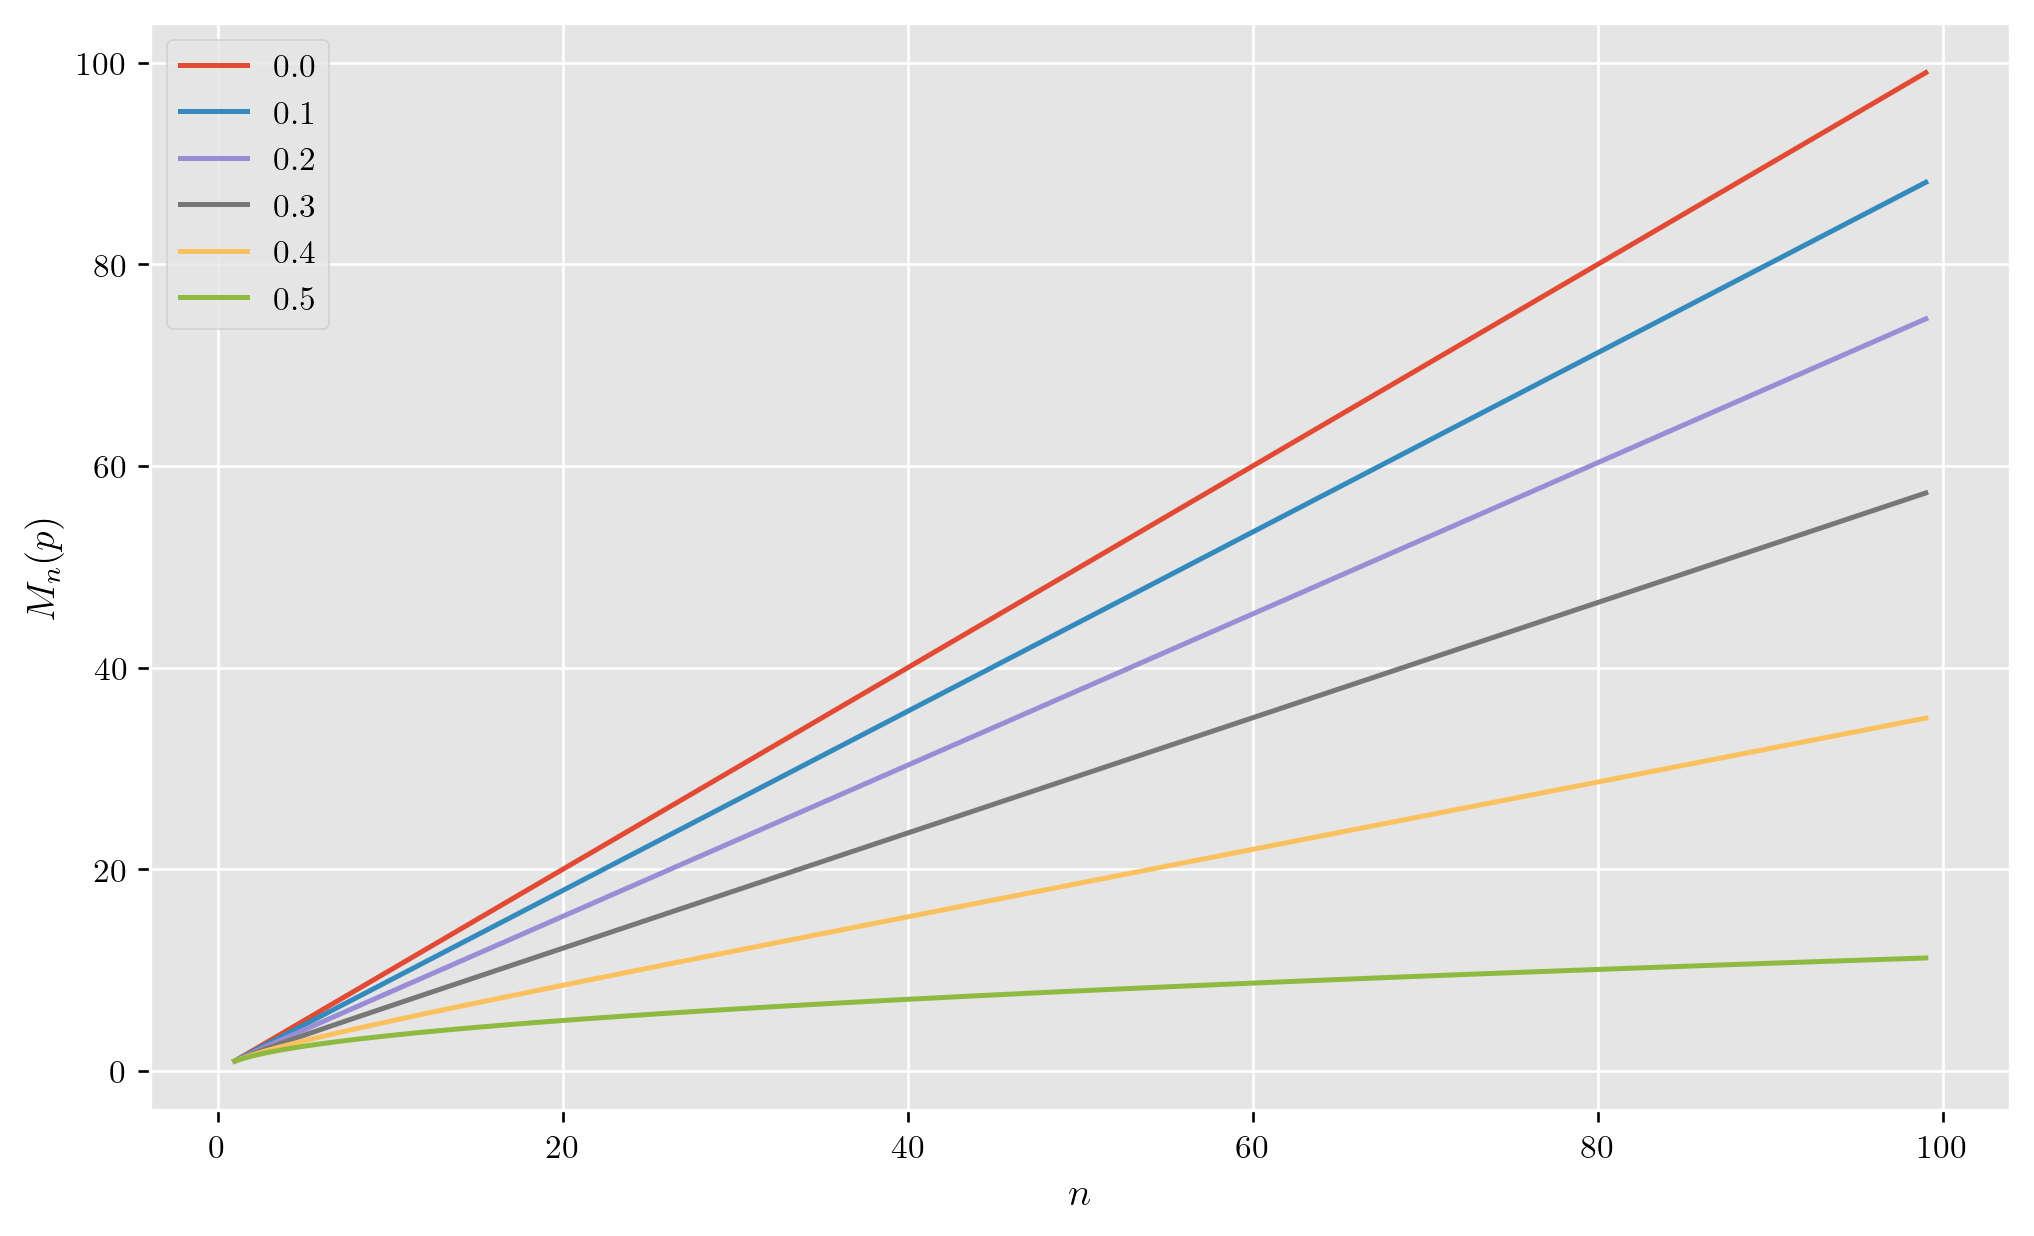

In [7]:
for i in range(0,6) :
    plt.plot(nn, MpData(i/10))

plt.legend([i/10 for i in range(0,6)])
plt.ylabel('$M_n(p)$')
plt.xlabel('$n$')
plt.show()

Plotting $M_n(p)$ as a function $p$ for $n=50,100, 150, ..., 300$

In [8]:
pp = np.arange(0,1,0.01)

# function to return M_n(p) for 0<=p<=1 and for a specific value of n
def MnData(n) :
    global pp
    return [M(n, p) for p in pp]

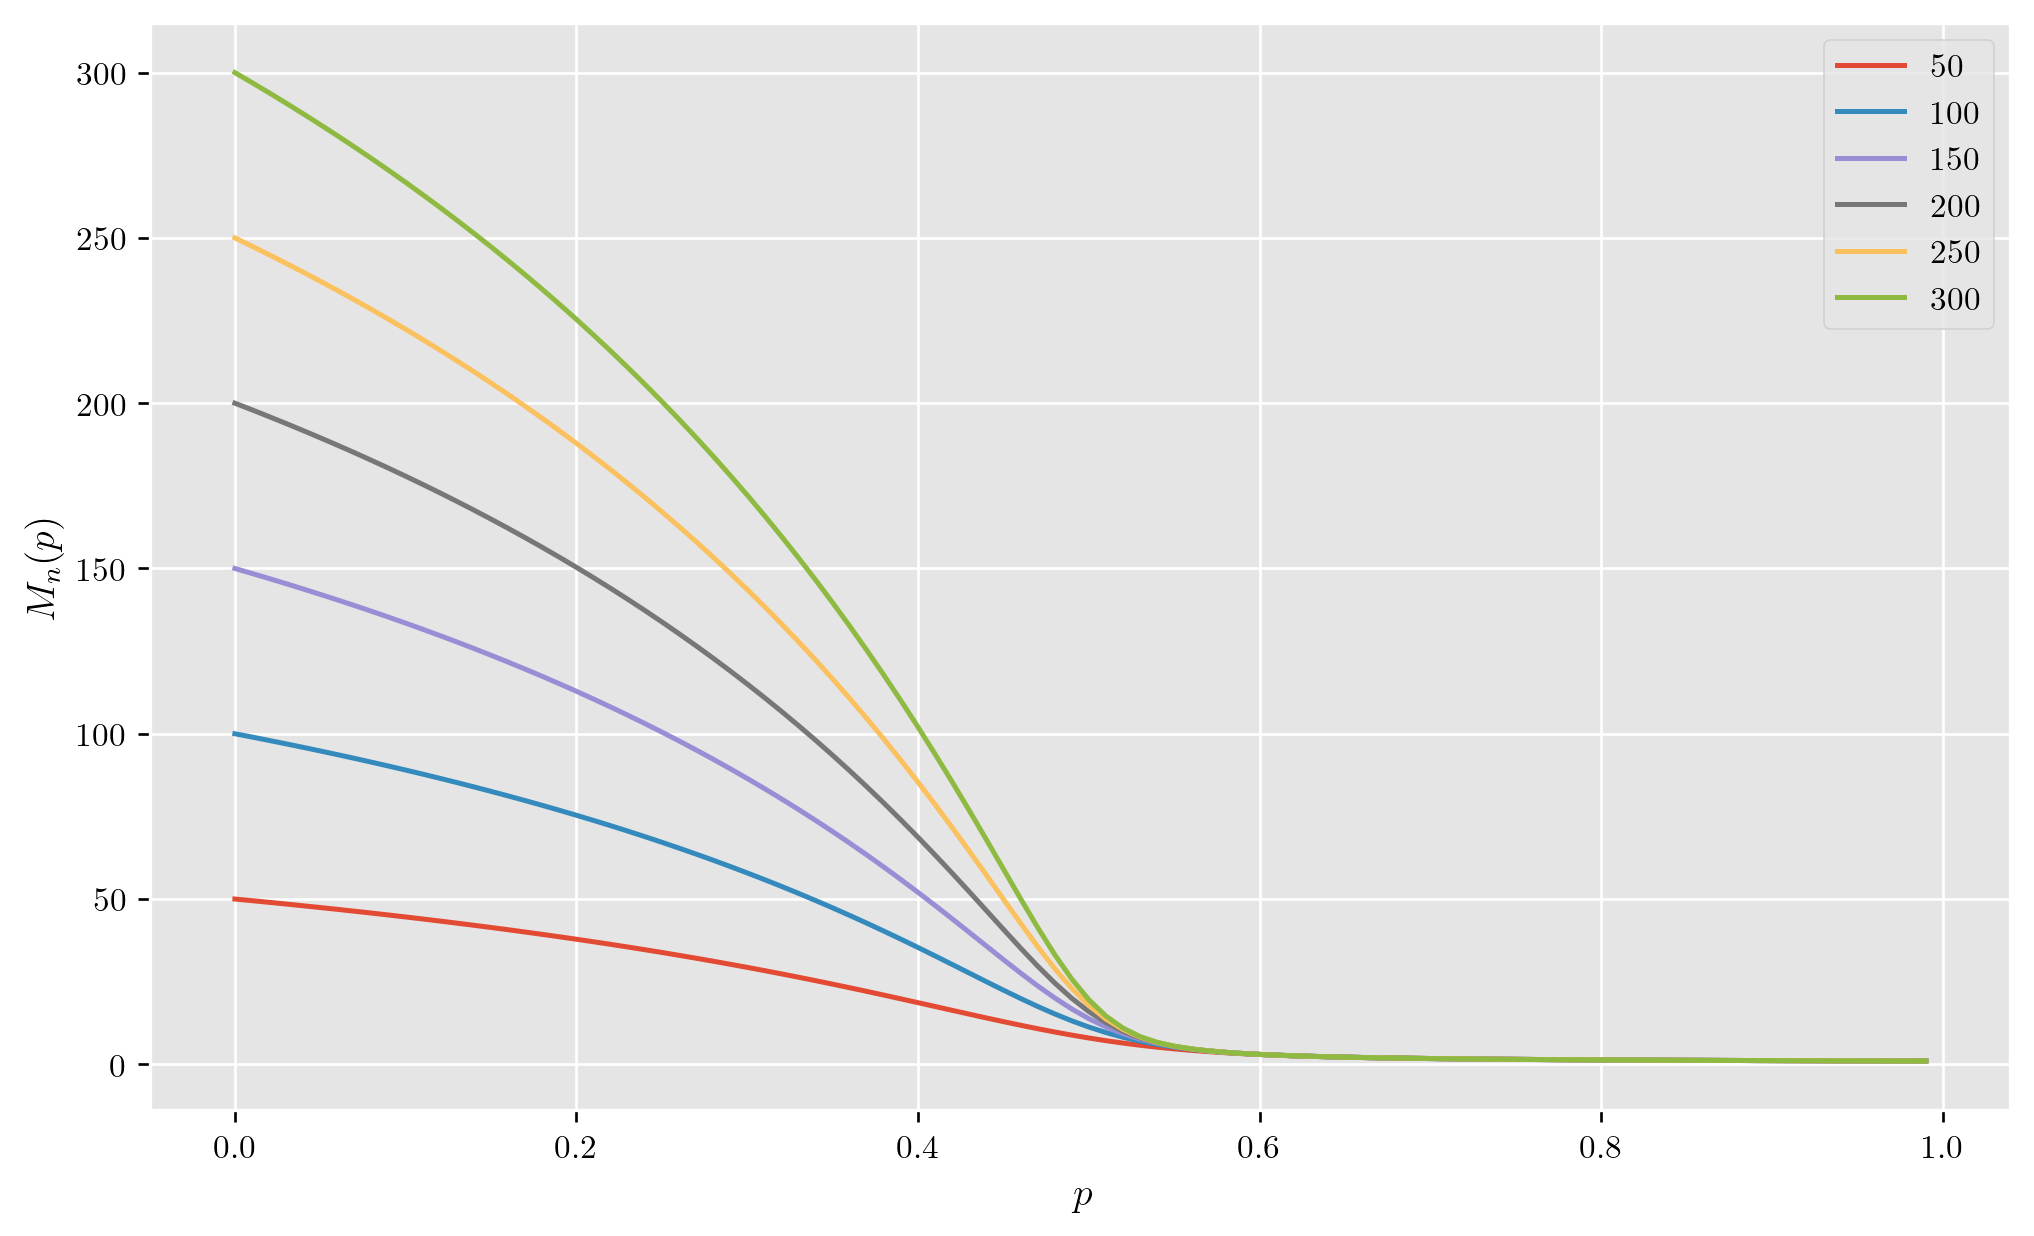

In [9]:
nValues = [50, 100, 150, 200, 250, 300]

for n in nValues :
    plt.plot(pp, MnData(n))

plt.legend(nValues)
plt.ylabel('$M_n(p)$')
plt.xlabel('$p$')

plt.show()

If $n$ is large there is a sharp transition point at $p=1/2$ -- in physics lingo this is a 'large $N$ phase transition that is smoothed out by $1/N$ corrections.'